In [1]:
#python notebook code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## load data
mydir = './data/FOOD_ATLAS/'

R  = pd.read_csv(mydir +  'Food_Environment_Atlas_RESTAURANTS.csv')
L  = pd.read_csv(mydir +  'Food_Environment_Atlas_LOCAL.csv')
C  = pd.read_csv(mydir +  'cancer_ALL.csv', skiprows=8)
CS = pd.read_csv(mydir +  'cancer_STOM.csv',skiprows=8)

## rename 
C = C.rename(columns = {'Age-Adjusted Incidence Rate(\xa0) - cases per 100,000':'AgeAdjusted'})
CS = CS.rename(columns = {'Age-Adjusted Incidence Rate(\x86) - cases per 100,000':'AgeAdjusted'})


In [2]:
# MERGING DATASET over county ID (FIPS)
RLC   = R.merge(L.merge(C,  on = 'FIPS'))
RLCS  = R.merge(L.merge(CS, on = 'FIPS'))
# drop na
RLC   = RLC.apply(pd.to_numeric, errors='coerce')
RLCS  = RLCS.apply(pd.to_numeric, errors='coerce')
# drop lower counts
ind   = RLC['Average Annual Count']>30
RLC   = RLC[ind]
ind   = RLCS['Average Annual Count']>30
RLCS  = RLCS[ind]

,0,1,2,3,4,5,6,7,8,9,10,11
PC_FFRSALES02,100.0,88.0,13.0,19.0,-10.0,9.0,12.0,-14.0,-13.0,-11.0,1.0,-8.0
PC_FFRSALES07,88.0,100.0,30.0,46.0,-2.0,16.0,18.0,-22.0,-18.0,-19.0,-2.0,-8.0
PC_FSRSALES02,13.0,30.0,100.0,95.0,4.0,14.0,30.0,-11.0,-4.0,-17.0,-10.0,-3.0
PC_FSRSALES07,19.0,46.0,95.0,100.0,5.0,15.0,28.0,-13.0,-6.0,-18.0,-9.0,-4.0
VEG_ACRESPTH07,-10.0,-2.0,4.0,5.0,100.0,-1.0,2.0,-11.0,-13.0,-7.0,-5.0,-8.0
AGRITRSM_OPS07,9.0,16.0,14.0,15.0,-1.0,100.0,53.0,-18.0,-14.0,-21.0,-6.0,1.0
AGRITRSM_RCT07,12.0,18.0,30.0,28.0,2.0,53.0,100.0,-16.0,-13.0,-18.0,-3.0,6.0
AgeAdjusted,-14.0,-22.0,-11.0,-13.0,-11.0,-18.0,-16.0,100.0,96.0,96.0,23.0,16.0
Lower 95% Confidence Interval,-13.0,-18.0,-4.0,-6.0,-13.0,-14.0,-13.0,96.0,100.0,84.0,19.0,30.0
Upper 95% Confidence Interval,-11.0,-19.0,-17.0,-18.0,-7.0,-21.0,-18.0,96.0,84.0,100.0,25.0,4.0


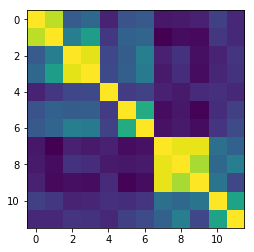

In [3]:
r = RLC.corr()*100
r = r.round();
r = r.loc[~r.FIPS.isnull(),~r.FIPS.isnull()]
r = r[abs(r.AgeAdjusted)>10]
r = r[r.index]
r.columns = range(len(r.columns))
plt.imshow(r)
r

,AgeAdjusted,FFR12
AgeAdjusted,1.000000,0.271538
FFR12,0.271538,1.000000


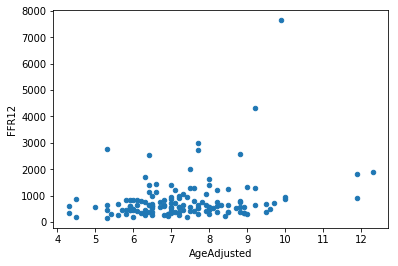

In [4]:
xy = RLCS[['AgeAdjusted', 'FFR12']]
xy.plot.scatter(xy.columns[0],xy.columns[1])
xy.corr()

,AgeAdjusted,FFR12
AgeAdjusted,1.000000,-0.000864
FFR12,-0.000864,1.000000


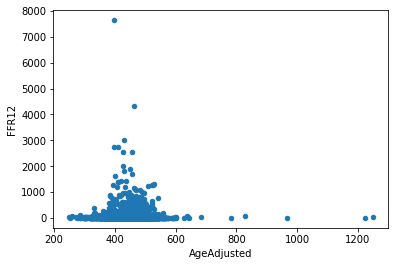

In [5]:
xy = RLC[['AgeAdjusted', 'FFR12']]
xy.plot.scatter(xy.columns[0],xy.columns[1])
xy.corr()
